In [1]:
!pip install scikit-image


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


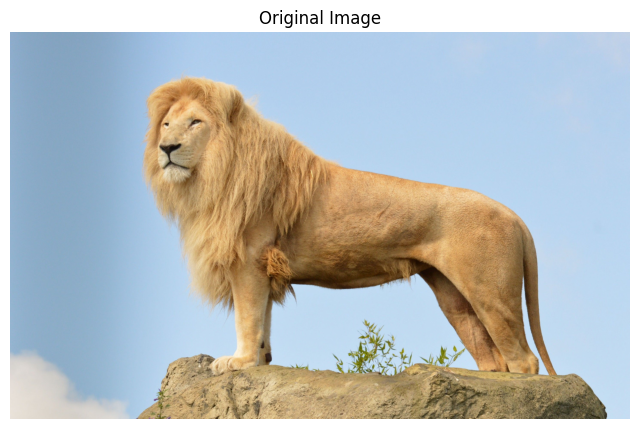

In [2]:
import cv2
import matplotlib.pyplot as plt

# Загрузка цветного изображения
image_path = 'lion.jpg'
color_image = cv2.imread(image_path)

# OpenCV загружает изображение в формате BGR, конвертируем его в RGB
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Отображение исходного изображения
plt.figure(figsize=(8, 6))
plt.title('Original Image')
plt.imshow(color_image_rgb)
plt.axis('off')  # Отключить оси
plt.show()

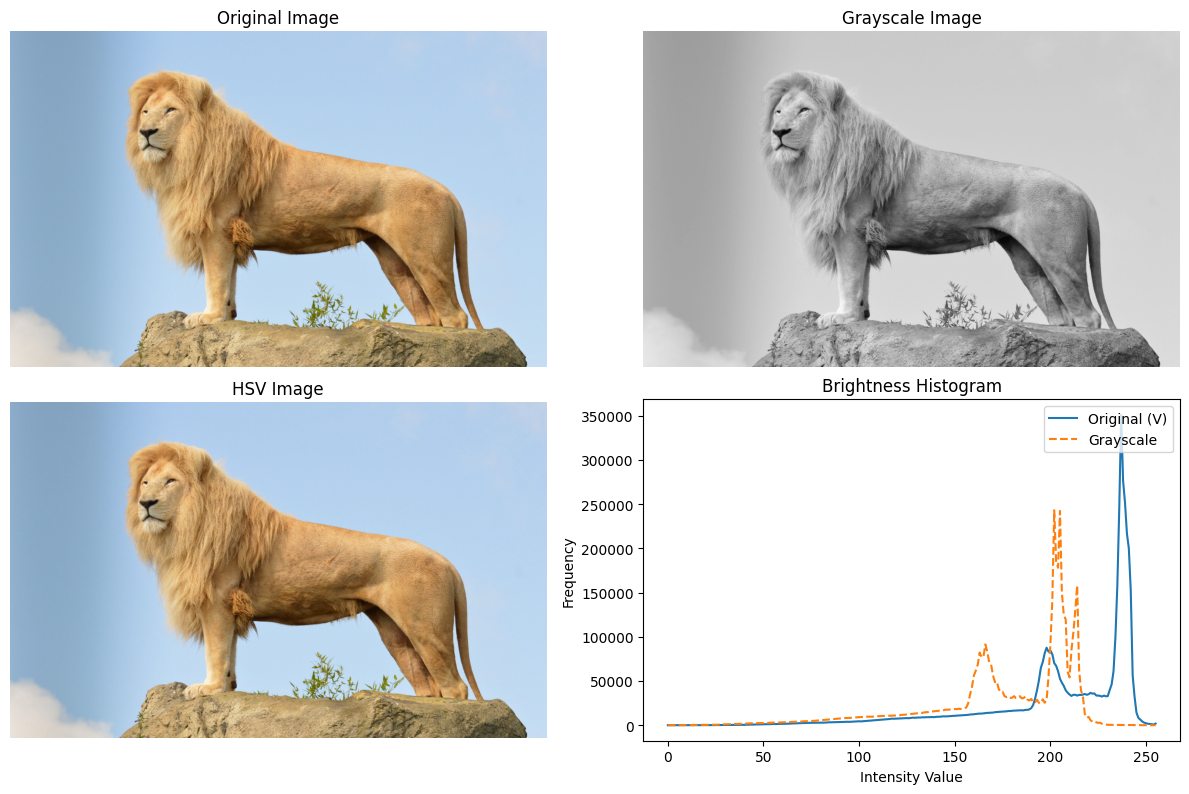

In [3]:
import cv2
import matplotlib.pyplot as plt

# Загрузка цветного изображения
image_path = 'lion.jpg'  # Укажите путь к вашему изображению
color_image = cv2.imread(image_path)
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Преобразование в Grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Преобразование в HSV
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# Отображение изображений
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(color_image_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('HSV Image')
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))  # Конвертируем обратно для корректного отображения
plt.axis('off')

# Построение гистограмм яркости
plt.subplot(2, 2, 4)
plt.title('Brightness Histogram')

# Гистограмма исходного изображения (по каналу Value из HSV)
brightness_original = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])  # Канал Value (V)
plt.plot(brightness_original, label='Original (V)')

# Гистограмма серого изображения
brightness_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(brightness_gray, label='Grayscale', linestyle='--')

plt.legend(loc='upper right')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

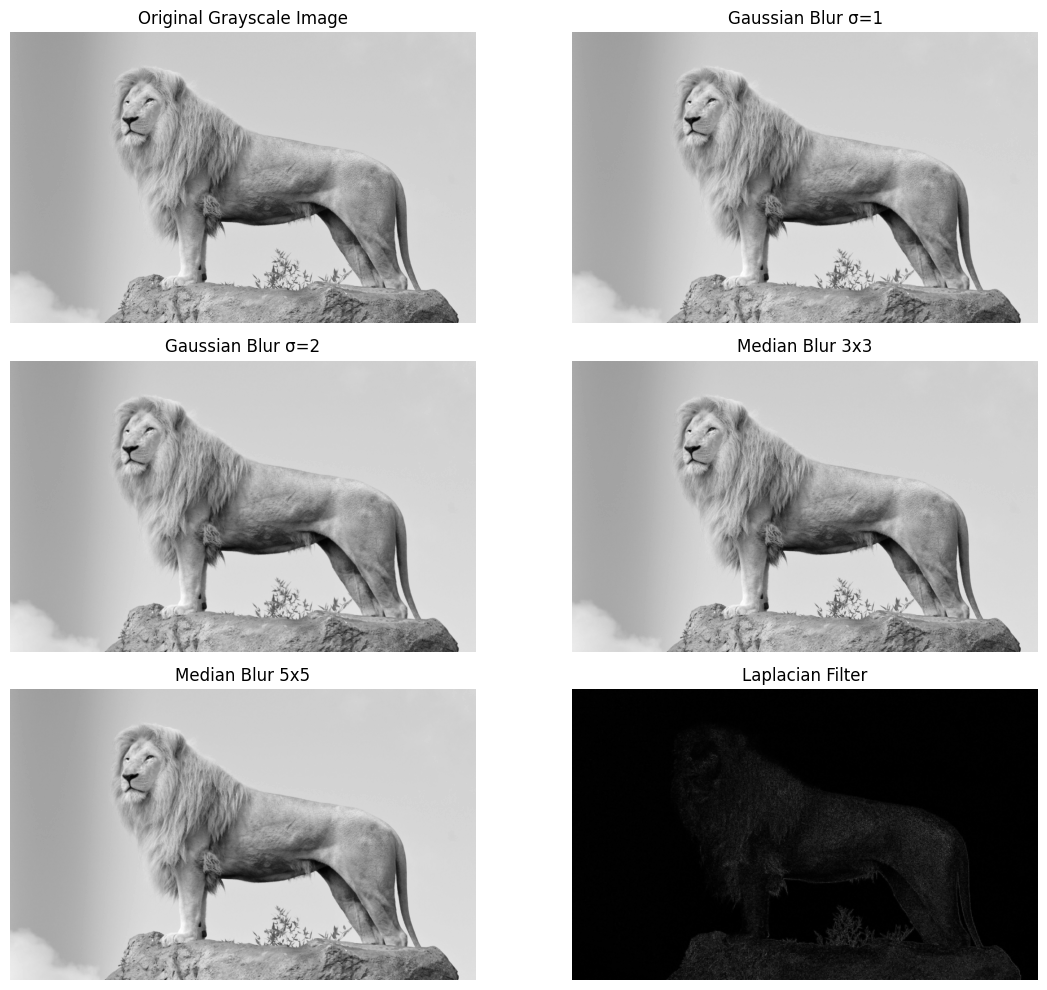

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка цветного изображения и преобразование в оттенки серого
image_path = 'lion.jpg'  # Укажите путь к вашему изображению
color_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Применение фильтров
# Гауссово сглаживание с разными значениями σ
gaussian_blur_sigma1 = cv2.GaussianBlur(gray_image, (5, 5), 1)  # σ=1
gaussian_blur_sigma2 = cv2.GaussianBlur(gray_image, (5, 5), 2)  # σ=2

# Медианный фильтр с разными размерами ядра
median_blur_3 = cv2.medianBlur(gray_image, 3)  # Кернел 3x3
median_blur_5 = cv2.medianBlur(gray_image, 5)  # Кернел 5x5

# Фильтр Лапласа для повышения резкости
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Отображение результатов
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Gaussian Blur σ=1')
plt.imshow(gaussian_blur_sigma1, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Gaussian Blur σ=2')
plt.imshow(gaussian_blur_sigma2, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Median Blur 3x3')
plt.imshow(median_blur_3, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Median Blur 5x5')
plt.imshow(median_blur_5, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title('Laplacian Filter')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
from skimage.metrics import structural_similarity as ssim

In [13]:
# PSNR (чем выше, тем лучше)
psnr1 = cv2.PSNR(gray_image, gaussian_blur_sigma1)
psnr2 = cv2.PSNR(gray_image, gaussian_blur_sigma2)

# SSIM (от 0 до 1, где 1 — идентичность)
ssim1 = ssim(gray_image, gaussian_blur_sigma1)
ssim2 = ssim(gray_image, gaussian_blur_sigma2)

print(f"PSNR: σ=1: {psnr1:.2f}, σ=2: {psnr2:.2f}")
print(f"SSIM: σ=1: {ssim1:.3f}, σ=2: {ssim2:.3f}")

PSNR: σ=1: 35.54, σ=2: 33.10
SSIM: σ=1: 0.938, σ=2: 0.891


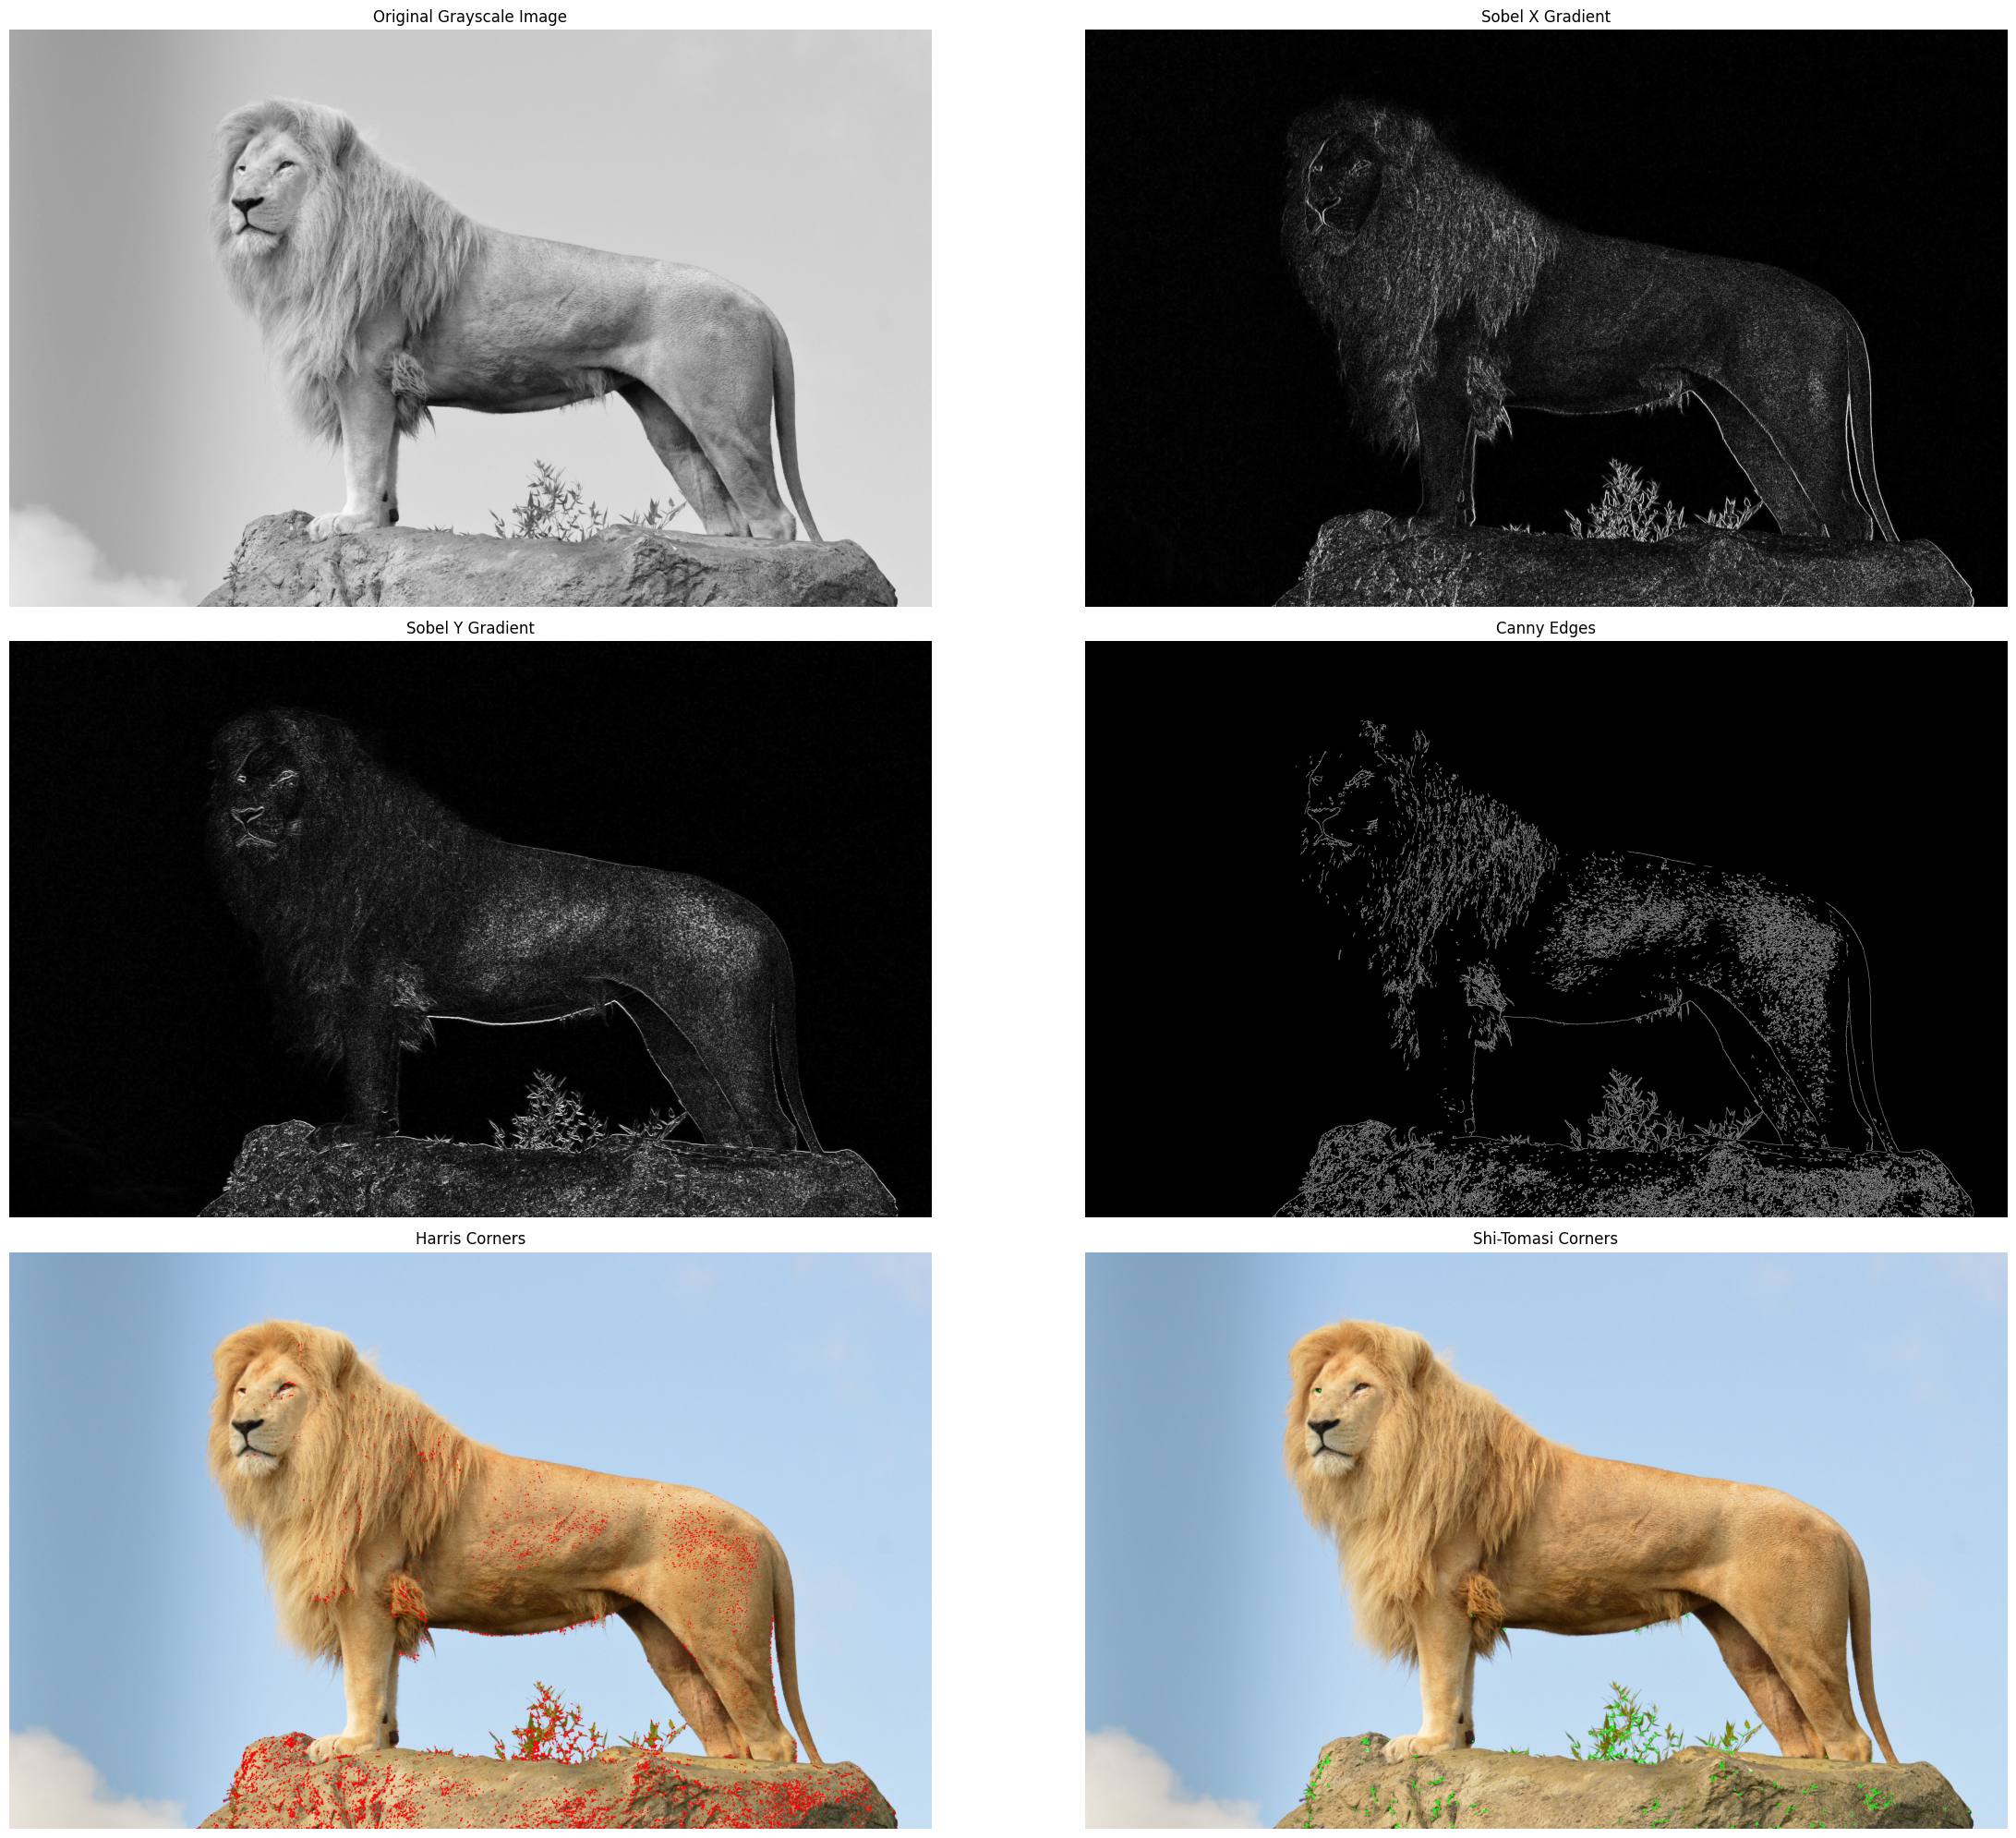

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка цветного изображения и преобразование в оттенки серого
image_path = 'lion.jpg'  # Укажите путь к вашему изображению
color_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Оператор Собеля для горизонтальных и вертикальных градиентов
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Применение алгоритма Кэнни для обнаружения краев
edges_canny = cv2.Canny(gray_image, 100, 200)

# Детектор углов Harris
dst = cv2.cornerHarris(np.float32(gray_image), 2, 3, 0.04)
dst_dilated = cv2.dilate(dst, None)  # Дилатация для усиления точек
harris_corners = color_image.copy()
harris_corners[dst_dilated > 0.01 * dst_dilated.max()] = [0, 0, 255]

# Детектор углов Shi-Tomasi
shi_tomasi_corners = cv2.goodFeaturesToTrack(
    gray_image, 
    maxCorners=400,       # максимальное количество углов
    qualityLevel=0.01,    # порог качества (0.01-0.1)
    minDistance=5,        # минимальное расстояние между углами
    blockSize=15           # размер окрестности (3-15)
)


shi_tomasi_corners = np.asarray(shi_tomasi_corners).astype(int)  # Используем astype(int)
shi_tomasi_image = color_image.copy()

for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv2.circle(shi_tomasi_image, (x, y), 3, (0, 255, 0), -1)

# Отображение результатов
plt.figure(figsize=(25, 20))

plt.subplot(3, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Sobel X Gradient')
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Sobel Y Gradient')
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Canny Edges')
plt.imshow(edges_canny, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Harris Corners')
plt.imshow(cv2.cvtColor(harris_corners, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title('Shi-Tomasi Corners')
plt.imshow(cv2.cvtColor(shi_tomasi_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

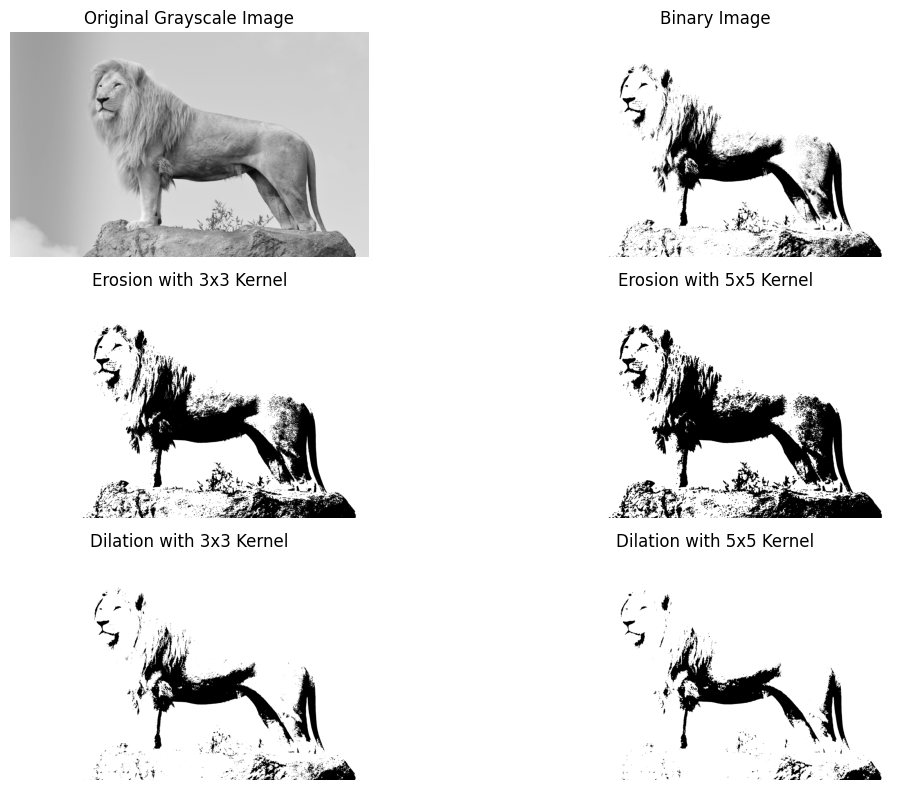

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка цветного изображения и преобразование в оттенки серого
image_path = 'lion.jpg'  # Укажите путь к вашему изображению
color_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Бинаризация (пороговая сегментация)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Создание структурных элементов
kernel_small = np.ones((3, 3), np.uint8)
kernel_large = np.ones((5, 5), np.uint8)

# Применение эрозии
erosion_small = cv2.erode(binary_image, kernel_small, iterations=1)
erosion_large = cv2.erode(binary_image, kernel_large, iterations=1)

# Применение дилатации
dilation_small = cv2.dilate(binary_image, kernel_small, iterations=1)
dilation_large = cv2.dilate(binary_image, kernel_large, iterations=1)

# Отображение результатов
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Erosion with 3x3 Kernel')
plt.imshow(erosion_small, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Erosion with 5x5 Kernel')
plt.imshow(erosion_large, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Dilation with 3x3 Kernel')
plt.imshow(dilation_small, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title('Dilation with 5x5 Kernel')
plt.imshow(dilation_large, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()